In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, InputLayer
import cv2

# Verify opencv-python installation
!pip install opencv-python

# Paths to image directories
normal_path = '/Users/shubhamkumarsingh/Desktop/Python 101 /Projects/Brain Tumour/archive-2 copy/no/'
tumor_path = '/Users/shubhamkumarsingh/Desktop/Python 101 /Projects/Brain Tumour/archive-2 copy/yes/'


In [2]:
# Load filenames of images
normal_cells = os.listdir(normal_path)
tumor_cells = os.listdir(tumor_path)

# Display first and last 5 filenames for both categories
print(f'First 5 normal cell images: {normal_cells[:5]}')
print(f'Last 5 normal cell images: {normal_cells[-5:]}')
print(f'First 5 tumor cell images: {tumor_cells[:5]}')
print(f'Last 5 tumor cell images: {tumor_cells[-5:]}')

# Print the number of images in each category
print(f'Number of normal brain cells: {len(normal_cells)}')
print(f'Number of tumor brain cells: {len(tumor_cells)}')


First 5 normal cell images: ['30 no.jpg', '22 no.jpg', '41 no.jpg', '14 no.jpg', 'no 10.jpg']
Last 5 normal cell images: ['35 no.jpg', 'no 6.jpg', '48 no.jpeg', '11 no.jpg', 'N2.JPG']
First 5 tumor cell images: ['Y157.JPG', 'Y6.jpg', 'Y194.jpg', 'Y180.jpg', 'Y90.jpg']
Last 5 tumor cell images: ['Y77.jpg', 'Y76.jpg', 'Y62.jpg', 'Y89.JPG', 'Y166.JPG']
Number of normal brain cells: 98
Number of tumor brain cells: 155


In [3]:
# Create labels for the images
normal_labels = [0] * len(normal_cells)
tumor_labels = [1] * len(tumor_cells)

# Combine labels into a single list
labels = normal_labels + tumor_labels

# Display some labels to verify
print(f'Labels for first 5 normal cells: {normal_labels[:5]}')
print(f'Labels for first 5 tumor cells: {tumor_labels[:5]}')
print(f'Total number of labels: {len(labels)}')


Labels for first 5 normal cells: [0, 0, 0, 0, 0]
Labels for first 5 tumor cells: [1, 1, 1, 1, 1]
Total number of labels: 253


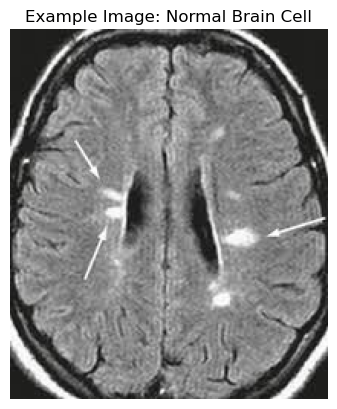

In [4]:
# Display an example image from the normal cells
example_image_path = os.path.join(normal_path, normal_cells[0])
example_image = mpimg.imread(example_image_path)
plt.imshow(example_image)
plt.title("Example Image: Normal Brain Cell")
plt.axis('off')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


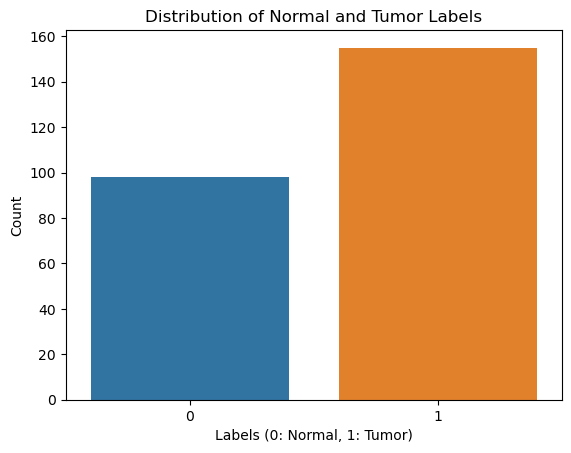

In [5]:
# Plot the distribution of labels
sns.countplot(x=labels)
plt.title('Distribution of Normal and Tumor Labels')
plt.xlabel('Labels (0: Normal, 1: Tumor)')
plt.ylabel('Count')
plt.show()



In [6]:
# Function to load and preprocess images
def load_images(image_files, image_path):
    data = []
    for img_file in image_files:
        image = Image.open(os.path.join(image_path, img_file))
        image = image.resize((128, 128))
        image = image.convert('RGB')
        data.append(np.array(image))
    return data

# Load and preprocess images for both categories
normal_data = load_images(normal_cells, normal_path)
tumor_data = load_images(tumor_cells, tumor_path)

# Combine data and convert to numpy arrays
data = normal_data + tumor_data
X = np.array(data)
Y = np.array(labels)

print(f'Shape of X (image data): {X.shape}')
print(f'Shape of Y (labels): {Y.shape}')


Shape of X (image data): (253, 128, 128, 3)
Shape of Y (labels): (253,)


In [7]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of Y_train: {Y_train.shape}')
print(f'Shape of Y_test: {Y_test.shape}')


Shape of X_train: (202, 128, 128, 3)
Shape of X_test: (51, 128, 128, 3)
Shape of Y_train: (202,)
Shape of Y_test: (51,)


In [8]:
# Define the CNN model
model = Sequential([
    InputLayer(input_shape=(128, 128, 3)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 254016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    32,514,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,516,097 (124.04 MB)

 Trainable params: 32,516,097 (124.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.4925 - loss: 3.0251 - val_accuracy: 0.9048 - val_loss: 0.2830
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.7387 - loss: 1.1749 - val_accuracy: 0.9048 - val_loss: 0.2311
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.8210 - loss: 0.5776 - val_accuracy: 0.7619 - val_loss: 0.3043
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.8472 - loss: 0.3082 - val_accuracy: 0.9524 - val_loss: 0.3193
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.9207 - loss: 0.1860 - val_accuracy: 0.9524 - val_loss: 0.2246
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.9749 - loss: 0.1185 - val_accuracy: 0.9048 - val_loss: 0.2274
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.9602 - loss: 0.0805 - val_accuracy: 0.9048 - val_loss: 0.2366
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 1.0000 - loss: 0.0421 - val_accuracy: 0.8571 - val_loss:

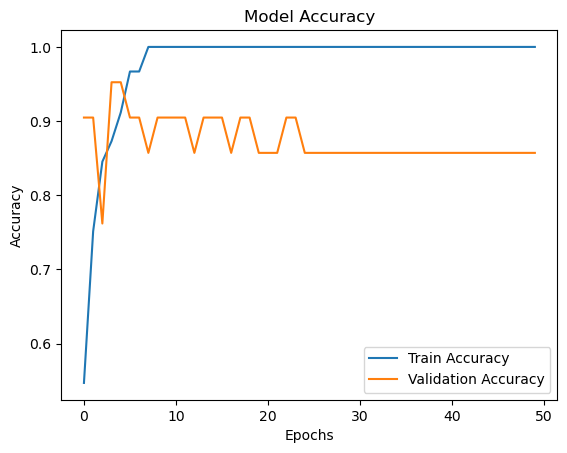

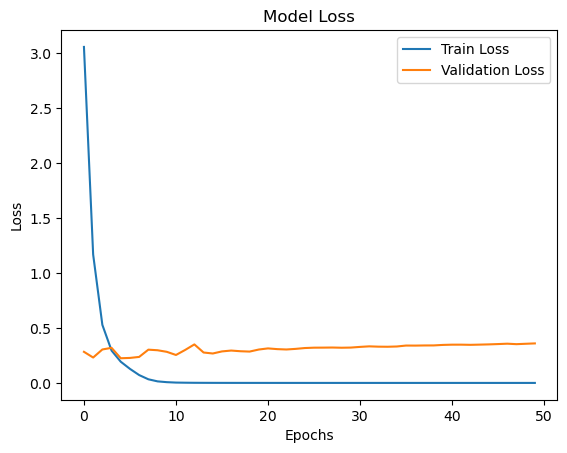

In [9]:
# Train the model
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.1, verbose=1)

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


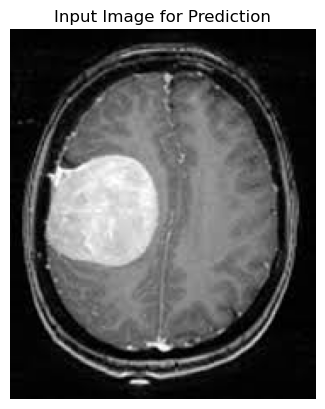

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction probabilities: [[0.9999996]]
Tumor Cell


In [10]:
# Predict on a new image
input_image_path = '/Users/shubhamkumarsingh/Desktop/Python 101 /Projects/Brain Tumour/archive-2 copy/brain_tumor_dataset/yes/Y1.jpg'
input_image = cv2.imread(input_image_path)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image_rgb)
plt.title("Input Image for Prediction")
plt.axis('off')
plt.show()

# Preprocess the input image
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_normalized = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_normalized, (1, 128, 128, 3))

# Make prediction
prediction = model.predict(input_image_reshaped)
print(f'Prediction probabilities: {prediction}')

# Determine the predicted label
predicted_label = 1 if prediction[0] > 0.5 else 0
print('Tumor Cell' if predicted_label == 1 else 'Normal Cell')


In [11]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, Y_test)

# Print the accuracy percentage
accuracy_percentage = accuracy * 100
print(f'Test Accuracy: {accuracy_percentage:.2f}%')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8903 - loss: 1.3135
Test Accuracy: 88.24%
